In [41]:
import os
os.environ["OMP_NUM_THREADS"] = "1"


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
#importing datasets
data_set= pd.read_csv('iris.csv')

In [47]:
x = data_set.iloc[:, [0, 1, 2, 3]].values
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [49]:
#Frequency distribution of species"
iris_outcome = pd.crosstab(index=data_set["target"],  # Make a crosstab
                              columns="count")      # Name the count column

iris_outcome

col_0,count
target,
Setosa,50
Versicolor,50
Virginica,50


In [51]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3) #Applying Kmeans classifier


In [53]:
y_kmeans = kmeans.fit_predict(x)

C:\Users\Ruturaj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [55]:
print(kmeans.cluster_centers_) #display cluster centers

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [57]:
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [59]:
data_set['cluster']=y_kmeans
#data_set.head()
#print(data_set['cluster'])
pd.set_option("min_rows", 2)
data_set




,sepal.length,sepal.width,petal.length,petal.width,target,cluster
0,5.1,3.5,1.4,0.2,Setosa,1
...,...,...,...,...,...,...
149,5.9,3.0,5.1,1.8,Virginica,0


In [61]:
iris_outcome = pd.crosstab(index=data_set["cluster"],  # Make a crosstab
                              columns="cluster")      # Name the count column

iris_outcome

col_0,cluster
cluster,
0,62
1,50
2,38


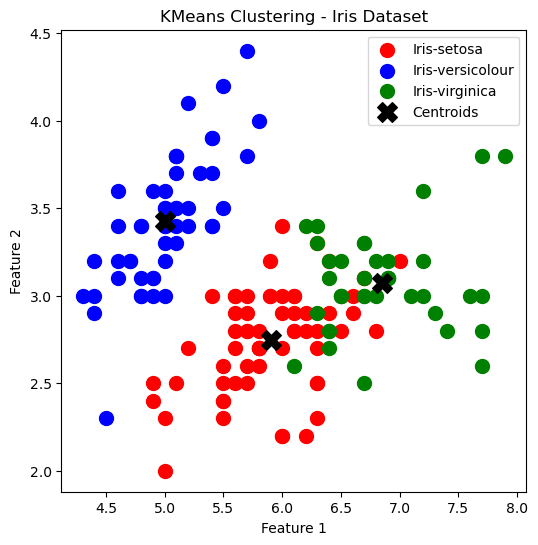

In [63]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(6,6))

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
            s=100, c='red', label='Iris-setosa')

plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
            s=100, c='blue', label='Iris-versicolour')

plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s=100, c='green', label='Iris-virginica')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='black', marker='X', label='Centroids')

plt.title("KMeans Clustering - Iris Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

# ✅ Save the figure
plt.savefig("kmeans_clusters.png")

plt.show()


C:\Users\Ruturaj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ruturaj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ruturaj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ruturaj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak o

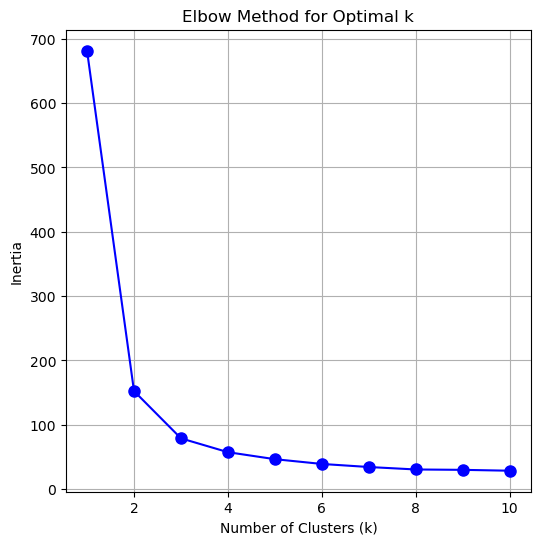

In [64]:
inertia = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(x)
    inertia.append(km.inertia_)

plt.figure(figsize=(6,6))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.savefig("kmeans_elbow.png")   # 📌 Saves elbow plot
plt.show()


C:\Users\Ruturaj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ruturaj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ruturaj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ruturaj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak o

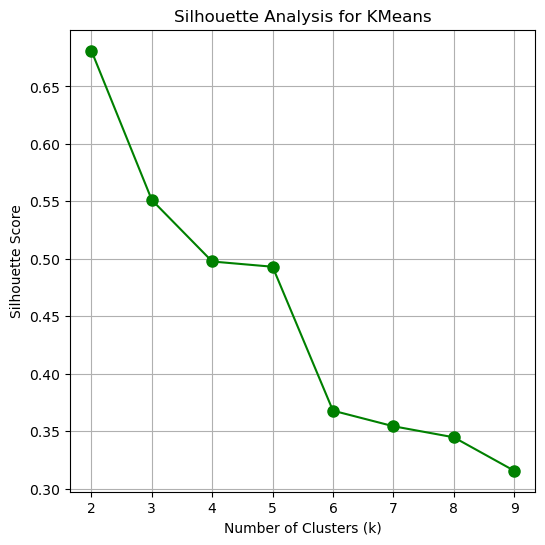

In [68]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
K = range(2, 10)  # silhouette needs k ≥ 2
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(x)   # ✅ changed X → x
    silhouette_scores.append(silhouette_score(x, labels))

plt.figure(figsize=(6,6))
plt.plot(K, silhouette_scores, 'go-', markersize=8)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for KMeans")
plt.grid(True)
plt.savefig("kmeans_silhouette.png")   # 📌 Saves silhouette plot
plt.show()
